In [13]:
import pandas as pd
import sqlite3
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

pd.set_option('display.max_columns', 100)

# Veri setini yükleme
file_path = 'PBL5recommendationdata.csv'
data = pd.read_csv(file_path, encoding="latin-1")

data.head()

C:\Users\telha\AppData\Local\Temp\ipykernel_13600\2148894670.py:12: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, encoding="latin-1")


,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

Müşteri Verileri (Customers): Müşteri bilgileri

Ürün Verileri (Products): Ürün bilgileri

Sipariş Verileri (Orders): Sipariş bilgileri

In [14]:
# Müşteri, Ürün ve Sipariş verilerini ayırma

customer_columns = list(filter(lambda col: col.startswith('Customers.'), data.columns))
product_columns = list(filter(lambda col: col.startswith('Products.'), data.columns))
order_columns = list(filter(lambda col: col.startswith('Orders.'), data.columns))

# Her bir veri çerçevesini oluşturma
customers_df = data[customer_columns]
products_df = data[product_columns]
orders_df = data[order_columns]

### Her bir veri çerçevesinin ilk birkaç satırını gösterme

In [15]:
customers_df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0.0


In [16]:
products_df.head()

,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,2310.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",NaN,80.70,57.64,NaN,44.00,0.0,NaN,NaN,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,NaN,Green,NaN,62.0,B00I6GQE0A,NaN,health-care-products,NaN,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,NaN,NaN,NaN,NaN,NaN,NaN,8000064C-1434298761,1.450325e+09,NaN,NaN,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...",NaN,NaN,NaN,"Basic Lightweight Rollators For Adults, With S...",NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,177.0,1.0,NaN,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,NaN,14.41,10.29,5.0,1.87,65.0,NaN,NaN,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,NaN,NaN,NaN,62.0,B000QF7Y76,NaN,health-care-products,NaN,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,NaN,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80008C35-1438901283,1.450322e+09,NaN,NaN,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,NaN,NaN,NaN,Urinary Drain Bags | MEDLINE - DYNC1674H,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,1.0,0.0,NaN,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX

In [17]:
orders_df.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


# SQLite veritabanı oluşturup veri çerçevelerini bu veritabanına aktaralım.

In [18]:
# SQLite veritabanı oluşturun ve veri çerçevelerini aktarma
conn = sqlite3.connect('customers_products_orders.db')
cursor = conn.cursor()
customers_df.to_sql('customers', conn, if_exists='replace', index=False)
products_df.to_sql('products', conn, if_exists='replace', index=False)
orders_df.to_sql('orders', conn, if_exists='replace', index=False)

# Bağlantıyı kontrol etmek için veritabanındaki tablo isimlerini sorgulama
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
conn.close()
tables

[('customers',), ('products',), ('orders',)]

C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\clust

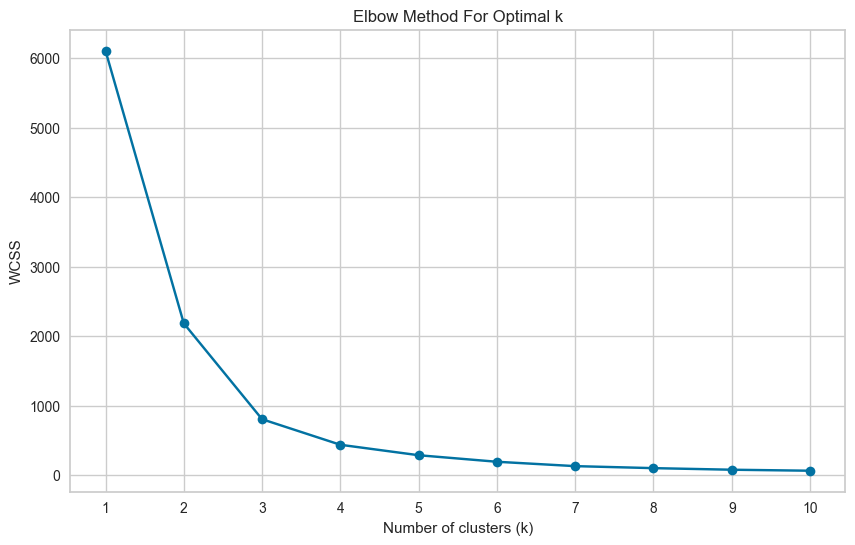

In [19]:
# combined_df veri çerçevesini oluşturma
combined_df = pd.merge(customers_df, orders_df, how='left', left_on='Customers.id', right_on='Orders.customer_id')

# Segmentasyon için özellikleri ölçeklendirme
segmentation_features = combined_df.groupby('Customers.id').agg({
    'Orders.id': 'count',  # Sipariş Sayısı
    'Orders.total': 'sum'  # Toplam Harcama
}).rename(columns={'Orders.id': 'Order_Count', 'Orders.total': 'Total_Spent'})

segmentation_features = segmentation_features.fillna(0)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_features)

# Elbow yöntemi ile optimal k değerini belirleme
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\telha\anaconda3\Lib\site-packages\sklearn\clust

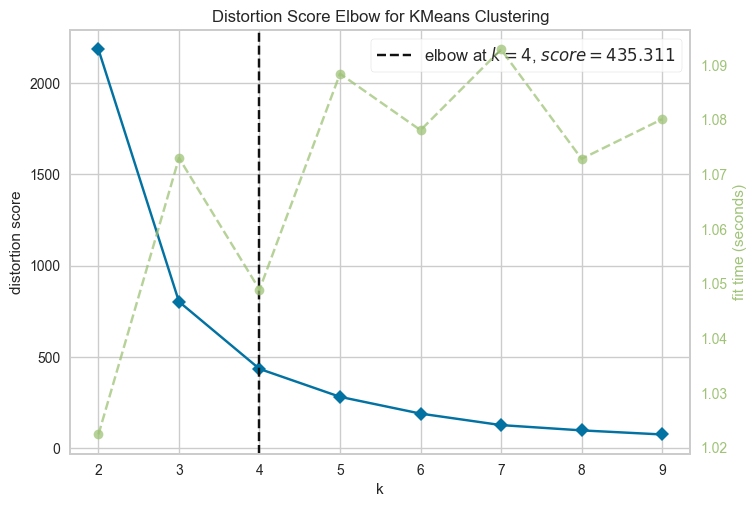

In [20]:
km=KMeans()
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(scaled_features)
visualizer.show();

In [21]:
# Elbow ve yellowbrick grafiğinden elde edilen optimal k değerini belirleyin
optimal_k = 4  # Bu değer, grafiğe bakarak belirlenmelidir

# KMeans algoritmasını optimal k değeri ile uygulayın
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
segmentation_features['Segment'] = kmeans.fit_predict(scaled_features)

# Segmentasyon sonuçlarını inceleyin
segmentation_summary = segmentation_features.groupby('Segment').mean()
print(segmentation_summary)

C:\Users\telha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         Order_Count    Total_Spent
Segment                            
0           2.574622     428.857176
1         977.000000  210151.405000
2        1681.000000  624386.950000
3         347.444444   82762.572222


Segment 0

Ortalama Sipariş Sayısı: 2.57

Ortalama Toplam Harcama: Yaklaşık 428.86 USD

Analiz: Bu segment, az sayıda sipariş veren ve düşük harcama yapan müşterileri temsil ediyor. Bu müşteriler genellikle tek seferlik veya nadiren alışveriş yapan müşteriler olabilir.

Segment 1

Ortalama Sipariş Sayısı: 977

Ortalama Toplam Harcama: Yaklaşık 210,151.41 USD

Analiz: Bu segment, çok yüksek sayıda sipariş veren ve çok yüksek miktarda harcama yapan müşterileri içeriyor. Bu müşteriler büyük olasılıkla toptan alıcılar veya işletmeler olabilir.

Segment 2

Ortalama Sipariş Sayısı: 1681

Ortalama Toplam Harcama: Yaklaşık 624,386.95 USD

Analiz: Bu segment, en yüksek sipariş sayısına ve harcamaya sahip müşterileri temsil ediyor. Bu müşteri grubu, iş hacmi yüksek büyük işletmeler veya anahtar müşteriler olabilir.

Segment 3

Ortalama Sipariş Sayısı: 347.44

Ortalama Toplam Harcama: Yaklaşık 82,762.57 USD

Analiz: Bu segment, orta düzeyde sipariş sayısı ve harcamaya sahip müşterileri temsil ediyor. Bu müşteriler düzenli alışveriş yapan, ancak Segment 1 ve 2'ye göre daha az harcama yapan müşteriler olabilir.


Bu analiz, işletmenin müşteri tabanını daha iyi anlamasını ve her müşteri grubuna uygun stratejiler geliştirmesini sağlayacaktır.